# Time Series

*Tuesday, September 24*

This Notebook walks us through the tools we need to analyse time series in Python. We will cover MA, AR and ARMA processes, covariance stationarity, smoothing and filtering, martingales and predictions of time-series.
Some familiarity with time-series is required.

### Content

- [1. Short introduction to properties of time-series](#1.-Short-introduction-to-properties-of-time-series)



### 1. Short introduction to time-series

#### 1.1. Covariance stationarity and stationarity

A time series is a series of data points indexed by time. Formally, it is a sequence of random variables ${X_t}$, where $t \in \mathbb N$ or $t \in \mathbb Z$, and $X_t \in \mathbb R, \forall t$. A time series is said to be covariance stationary if:
* its mean is constant across times/does not depend on $t$: $\mathbb E [X_t] = \mu \quad \forall t$
* its variance is constant in each time $t$: $ \mathrm{Var}[X_t] = \sigma^2 \quad$
* its autocovariance is finite and constant for two random variables equally spaced in time: $\mathrm{cov}(X_t, X_{t+k}) = \mathrm{cov}(X_{t+n}, X_{t+n+k})$

Developping a formal understanding of time-series is an essential step before moving on to forecasts of the series.

#### 1.2. Examples

White noise is a stationary process. White noise is a random signal with equal intensity at all frequencies. It is defined as  a random process with mean zero, constant variance and 0 auto-covariance. $$X_t = \epsilon_t$$ with $$\epsilon_t \sim \mathcal{N}(0, \sigma^2)$$ is a white noise process for instance. Moving Average (MA) processes are defined as sums of white noise processes with finite coefficients: *e.g.* $$Y_t = \sum_{k=0}^{K} \beta_k \epsilon_{t-k}$$ They also exhibit covariance stationarity.

See the graphs of these processes below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels as sm
%matplotlib nbagg

No handles with labels found to put in legend.
No handles with labels found to put in legend.


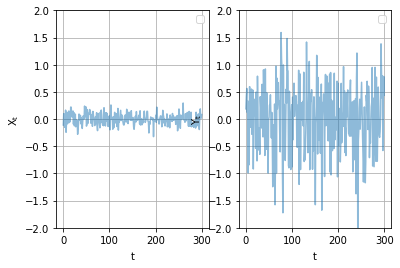

In [2]:


np.random.seed(123)

t = np.linspace(0, 300, 300)

alpha = 0
epsilon = np.random.normal(loc=0.0, scale = .1, size=len(t))
wn = alpha + epsilon

# Creating MA process with specific coefficients
ma = np.zeros(len(t))
coeffs = [10, 7, 6, 1, 7, 8, 3, 4, 2, 1]
for i in range(10):
    ma = ma + np.random.normal(loc=0.0, scale = coeffs[i]*i*0.01, size=len(t))

# Plotting the two time series
plt.figure(1)
plt.subplot(121)
plt.plot(t, wn, alpha=0.5)
plt.xlabel("$\mathrm{t}$")
plt.ylabel("$\mathrm{X_t}$")
plt.legend()
plt.ylim(-2, 2)
plt.grid()

plt.subplot(122)
plt.plot(t, ma, alpha=0.5)
plt.xlabel("$\mathrm{t}$")
plt.ylabel("$\mathrm{Y_t}$")
plt.legend()
plt.ylim(-2, 2)
plt.grid()

It is easy to verify that they are covariance stationary.

0-mean processes can describe a wide variety of time-series with real applications in economics and finance. The 0-mean assumption is also without loss of generality as this does not affect the variance and covariance of the processes, and the mean of the random variables holds up to an additive constant.

#### 1.3. Wold's decomposition theorem

In particular, [Wold's representation theorem](https://en.wikipedia.org/wiki/Wold%27s_theorem) (Herman Wold, 1908-1992) says that every covariance-stationary time series $X_t$ can be written as the sum of two time series, one *deterministic* and one *stochastic*.

Formally
$$X_{t}=\sum _{k=0}^{\infty }b_{k}\varepsilon _{t-k}+\eta _{t}$$
where:
* $X_t$ is any covariance-stationary process
* $\varepsilon_t$ terms are white noises
* $\beta_k$ coefficients are potentially infinitely many linear filter weights. They must be square summable ( $\sum _{k=0}^{\infty }|b_{k}|^{2} < \infty$ ), constant, and causal (*i.e.* $k \geq 0$)
* $\eta_t$ is a deterministic time series, for instance a sine wave sampled every $\dfrac{\pi}{8}$

#### 1.4. AR(p) processes

Auto-regressive processes of order $p$ are defined as $$ X_{t}=c+\sum _{k=1}^{p}\varphi _{k}X_{t-k}+\varepsilon _{t}$$ 

They are common in economics and finance. With many applications to financial and macroeconomic time series. For an AR(p) process to be stationary, the roots of the polynomial $ \Phi (z):=\textstyle 1-\sum _{i=1}^{p}\varphi _{i}z^{i} $ must lie outside the unit circle, *i.e.*, each (complex) root $ z_{i} $ must satisfy $ |z_{i}|>1 $. For an AR(1) process, this simply means: $|\varphi_1 | < 1 $.

##### 1.4.1. AR(1) processes

An AR(1) process is simply defined as $$ X_t = \varphi X_{t-1} + \varepsilon_t $$ or by repeated substitutions: $$ X_t = \sum_{k=0}^{\infty} \varphi^k \varepsilon_{t-k}$$ 

We get:
$$ \mathbb E[X_t] = 0, \quad \mathrm{cov}(X_t, X_{t-k}) = \sigma^2 \dfrac{\varphi^k}{1-\varphi^2}, \quad \mathrm{and} \quad \mathrm{Var}(X_t) = \dfrac{\sigma^2}{1 - \varphi^2} $$

We can visualise such process easily:

In [3]:
# Time
t = np.linspace(1, 50, 50)

# Parameters
epsilon2 = np.random.normal(loc=0.0, scale = 0.5, size=len(t))
phi = 0.85

# Series
X_t = np.zeros(len(t))
X_t[0] = 1
for k in range(1, len(t)):
    X_t[k] = X_t[k-1]*phi + epsilon2[k]

X_neg_t = np.zeros(len(t))
X_neg_t[0] = 1
for k in range(1, len(t)):
    X_neg_t[k] = X_neg_t[k-1]*(-phi) + epsilon2[k]    

# Covariances
acov1 = [phi**k/(1 - phi**2) for k in t]
acov2 = [(-phi)**k/(1 - phi**2) for k in t]

For both series, the autocovariance of the $k^{th}$ term with the first term deacreases asymptotically toward zero as time elapses.

No handles with labels found to put in legend.
No handles with labels found to put in legend.


(-4, 4)

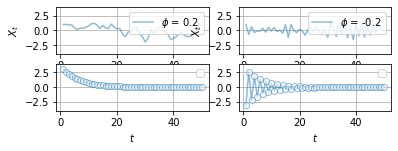

In [4]:
# Plot
plt.figure(2)
plt.subplot(421)
plt.plot(t, X_t, alpha=0.5, label = '$\phi $ = 0.2')
plt.grid()
plt.ylabel("$X_t$")
plt.legend()
plt.ylim(-4, 4)

plt.subplot(423)
plt.plot(t, acov1, marker='o', fillstyle='full', markerfacecolor='white', alpha=0.5)
plt.grid()
plt.xlabel("$t$")
plt.legend()
plt.ylim(-4, 4)

plt.subplot(422)
plt.plot(t, X_neg_t, alpha=0.5, label = '$\phi $ = -0.2')
#plt.xlabel("$\mathrm{t}$")
plt.ylabel("$X_t$")
plt.legend()
plt.grid()
plt.ylim(-4, 4)

plt.subplot(424)
plt.plot(t, acov2, marker='o', fillstyle='full', markerfacecolor='white', alpha=0.5)
plt.grid()
plt.xlabel("$t$")
plt.legend()
plt.ylim(-4, 4)



##### 1.4.2. Properties of AR(p) processes

#### 1.5. MA(p) processes

##### 1.5.1. MA(1) process

A moving average process of order $p$ is defined as $$X_t = \mu + \sum_{k=0}^p \varphi_k \varepsilon_{t-k}$$ and its properties are:

$$ \mathrm{var}(X_t) = \sigma^2 (1 + \sigma^2), \quad \mathrm{cov}(X_t, X_{t+1}) = \sigma^2 \varphi, \quad \mathrm{and}  \quad \mathrm{cov}(X_t, X_{t+k}) = 0 \quad \mathrm{for} \quad k>1  $$

##### 1.5.2. Properties of MA(p) processes

#### ARMA(p, q) processes

Simply defined as $$ X_t = \sum_{k=0}^p \theta_i X_{t-i} + \sum_{i=0}^q \varphi_k \varepsilon_{t-k} $$

Or with the lag operator $L^k X_t = X_{t-k}$, the expression above can be re-written:

$$\begin{split}
X_t - \sum_{k=0}^p \theta_i L^k X_t = & \sum_{i=0}^q \varphi_k L^i \varepsilon_t \\
L^0 X_t - \theta_1 L^1 X_t - ... - \theta_p L^p X_t = & L^0 \varepsilon_t + \varphi_1 L^1 \varepsilon_t + ... + \varphi_q L^q \varepsilon_t
\end{split}$$

Defining the polynomials  $ \theta(x) $ and $ \varphi(x) $ to be the corresponding polynomials of the left- and right-hand sides respectively:

$$\begin{split}
\theta(x) := 1 - \theta_1 x - ... - \theta_p x^p
\quad \text{and} \quad
\varphi(x) := 1 + \varphi_1 x + ... + \varphi_q x^q
\end{split}$$

We get the following sufficient condition for the covariance-stationarity of $X_t$: 
**$X_t$ is covariance-stationary if the roots of of the $\theta(x)$ polynomial associated with the AR(p) part of the ARMA(p, q) process lie outside of the unit disk in the complex plane.**


### 2. Time series in statsmodels

`statsmodels` provides us with the tools necessary to analyse and tests ARMA processe sin Python. These functions are accessed through the `tsa` submodule of `statsmodels`.

Other available modules to deal with time-series are the QuantEcon `arma.py` module (imported through the [`QuantEcon.py` package](https://quantecon.org/quantecon-py)), and the probabilistic programming module [PyMC3](https://docs.pymc.io/), which we'll cover later in this lecture.

In this section, we provide a partial overview of some of the most useful functionalities of `tsa` for social science research.


#### Seasonal decomposition

`seasonal_decompose` can be used to separate additive or multiplicative time trends in a time series from seasonal fluctuations.
We can try to decompose US real GDP. We purposedly use a non-seasonally adjusted dataset. On the St.-Louis Fed's website, we can find such time-series, covering the 1947-2019 period, measured in US$ millions. You can find this series [here](https://fred.stlouisfed.org/series/NA000334Q)

In [5]:
gdp = pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=NA000334Q&scale=left&cosd=1947-01-01&coed=2019-04-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2009-06-01&line_index=1&transformation=lin&vintage_date=2019-09-11&revision_date=2019-09-11&nd=1947-01-01',
                parse_dates=['DATE'], index_col='DATE')
print(gdp.head())
print(gdp.dtypes)

            NA000334Q
DATE                 
1947-01-01    58497.0
1947-04-01    60672.0
1947-07-01    62196.0
1947-10-01    68250.0
1948-01-01    64258.0
NA000334Q    float64
dtype: object


C:\Users\dyevre\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


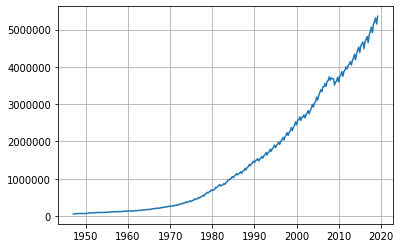

In [6]:
plt.figure(3)
plt.plot(gdp['NA000334Q'])   # Note: we do not need to specify the dates here as they are already defined as indices
plt.grid()

It is rather obvious that we would need a multiplicative decomposition, but we try both here for the sake of exposition. The `seasonal_decompose` is useful in that it stores the trend --multiplicative or additive--, the seasonal component, and the residual in a custom-made container `DecomposeResult`.

Note how the residual of the additive decomposition still have some pattern.

Text(0.5, 0.98, 'Additive Decompose')

<Figure size 432x288 with 0 Axes>

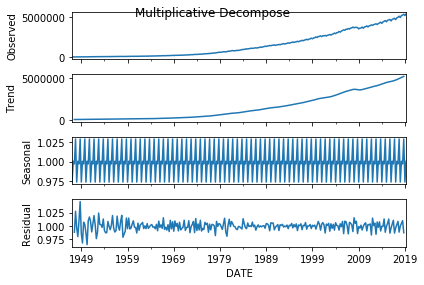

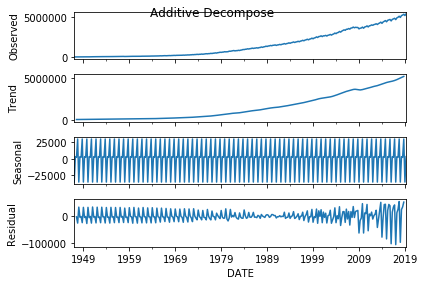

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Multiplicative decomposition 
mul = seasonal_decompose(gdp['NA000334Q'], model='multiplicative')

# Additive decomposition
add = seasonal_decompose(gdp['NA000334Q'], model='additive')

plt.figure(2)
mul.plot().suptitle('Multiplicative Decompose')
add.plot().suptitle('Additive Decompose')

Let's now store all the separate components of the decompositions, so as to be able to re-use them later. We wrap them in a Panda dataframe:

In [18]:
gdp_add = pd.concat([add.seasonal, add.trend, add.resid, add.observed], axis=1)
gdp_mul = pd.concat([mul.seasonal, mul.trend, mul.resid, mul.observed], axis=1)
gdp_add.columns = ['Seasonal', 'Trend', 'Residual', 'Observed']
gdp_mul.columns = ['Seasonal', 'Trend', 'Residual', 'Observed']

gdp_add.head()

,Seasonal,Trend,Residual,Observed
DATE,,,,
1947-01-01,-35120.442421,NaN,NaN,58497.0
1947-04-01,3216.837509,NaN,NaN,60672.0
1947-07-01,2090.884922,63123.875,-3018.759922,62196.0
1947-10-01,29812.719991,64577.375,-26140.094991,68250.0
1948-01-01,-35120.442421,66208.500,33169.942421,64258.0


#### Transforming non-statiionary series into stationary ones




#### Standard filters


Baxter-King bandpass filter, 	
Hodrick-Prescott filter, 
Convolve two N-dimensional arrays using FFT,
Kalman Filter code intended for use with the ARMA model

#### tests of co-integration and stationarity, and unit roots

Augmented Dickey-Fuller unit root test,
Durbin test



### PyMC3

Maximum likelihood is an intuitive and popular method of statistical inference. It involves choosing a set of parameters such that, when fed to a Data Generating Process (DGP), they match the observed moments of the data. The main advantages of maximum likelihood estimation are:
* its efficiency: It achieves the **Cramer-Rao** lower bound when $n \rightarrow \infty$
* its consistency: The ML estimator converges in probability to the true parameter $\hat{\theta}_{MLE} \xrightarrow{p} \theta$, and even almost surely under stricter regularity conditions
* its versatility: Any DGP can be estimated by MLE. It is more versatile than linear regression as it allows for more intricate relationships between variables.

Its main drawback is that it requires us to assume a specific parametric distribution of the data.

### 2. Coding the MLE estimator 

#### 2.1. The linear case

Let's create a random sample of size $N = 1,000$, generated by the following DGP: $$ \mathbf{y} = \mathbf{X \beta} + \mathbf{\varepsilon} \\ \varepsilon \sim \mathcal{N}(0, \sigma^2 I)$$
The normality of errors and their 0-correlation ensure they are independent, a property we will use when implementing the MLE method.

In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mp
%matplotlib nbagg
import matplotlib.pyplot as plt

import statsmodels as sm

In [ ]:
# True values of X's will be linear functions measured without noise
X1_true = np.linspace(0, 100, 1000) 
X2_true = np.linspace(0, -500, 1000) 
X3_true = np.linspace(0, 2000, 1000) 

# We also add a vector of ones to the matrix of observables, this will allow us to include an intercept in the model
X0 = np.ones(1000)

X_true = np.array([X0,
              X1_true, 
              X2_true,
              X3_true]).T

# We define observed covariates as the sum of the true X's + normal noise (can be interpreted as measurement error or simply as a way to avoid perfect multicolinearity) 
np.random.seed(123)
X1 = X1_true + np.random.normal(loc=0.0, scale = 10, size=1000)
X2 = X2_true + np.random.normal(loc=0.0, scale = 50, size=1000) 
X3 = X3_true + np.random.normal(loc=0.0, scale = 200, size=1000)

X = np.array([X0,
              X1, 
              X2,
              X3]).T

# True parameters
β = np.array([5, 10, -.5, .25]).T
sigma = 100
epsilon = np.random.normal(loc=0.0, scale = sigma, size=1000)

# Measured and true values
y = X @ β + epsilon
y_true = X_true @ β

We get a simple linear, homoskedastic relastionship between the covariates and the observed $y_i$. See for instance $\mathbf{y}$ with respect to $\mathbf{x_1}$ below

In [ ]:
plt.scatter(X1, y, c="c", alpha=0.2, label="Data")
plt.scatter(X1_true, y_true, c="r", alpha=0.1, marker='.', label = "True values")
plt.xlabel("$\mathrm{x_1}$")
plt.ylabel("$\mathrm{y}$")
plt.legend()

OLS is BLUE in this case. Now if we estimate the coefficients by OLS we get $\hat{\beta}_{OLS} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^{T}\mathbf{y} $

In [ ]:
β_ols = np.linalg.inv((X.T @ X)) @ (X.T @ y)
β_ols

Now under normality of errors, OLS and MLE estimates of the coefficients are asymptotically equal. Let's define an iterative procedure to estimate $\boldsymbol{\beta}$ through MLE and verify that the results are in line with OLS. When errors are normally distributed, we do not need to go through such lengths as the MLE estimator has a closed-form solution. But we simply show how the convergence algorithm works in this simple case. 

Our true parameter values are $$\boldsymbol{\beta} = \begin{bmatrix}
                            \alpha \\
                            \beta_1 \\
                            \beta_2 \\
                            \beta_3
                      \end{bmatrix}  = \begin{bmatrix}
                            10 \\
                            5 \\
                            0.5 \\
                            0.25
                      \end{bmatrix}
                      , \sigma = 100$$
We define a likelihood function, based on $N$ draws of the data $$f\left(\mathbf{y} | \mathbf{X} ; \boldsymbol{\beta}, \sigma^{2}\right)=\prod_{i=1}^{N} f\left(y_{i} | x_i , \boldsymbol{\beta}, \sigma^{2}\right)$$
where we assume that errors are normally i.i.d, so

$$ f\left(y_{i} | x_i , \boldsymbol{\beta}, \sigma^{2}\right) = \frac{1}{\sqrt{2 \pi} \sigma} \cdot e^{-\frac{1}{2 \sigma^{2}}\left(y_{i}-x_{i}^{\prime} \boldsymbol{\beta}\right)^{2}} $$

We further define the likelihood function $\mathcal{L}(\boldsymbol{\beta} | \mathbf{y}, \mathbf{X})$ which treats the parameters $\boldsymbol{\beta}$ and $\sigma$ as random and the values $\mathbf{y, X}$ as given. MLE consists in maximising the value of $\mathcal{L}(\boldsymbol{\beta}, \sigma | \mathbf{y}, \mathbf{X})$ by chosing $\boldsymbol{\beta}$ and $\sigma$ optimally. It is easier to work with the log of the likelihood function and this does not affect the maximiser as any monotonically increasing transformation of a function has the same maximiser.

We thus maximise:

$$
\begin{split}
\ln{\mathcal{L} \left( \boldsymbol{\beta}, \sigma | \mathbf{y}, \mathbf{X} \right)} = & \ell\left(\boldsymbol{\beta}, \sigma | \mathbf{y}, \mathbf{X} \right) \\
        = & -\frac{n}{2} \ln (2 \pi)-\frac{n}{2} \ln \left(\sigma^{2}\right)-\frac{1}{2 \sigma^{2}} \sum_{i=1}^{N}\left(y_{i}-x_{i}^{\prime} \beta\right)^{2}
\end{split}
$$

And our solution is:

$$
\left( \hat{\beta}_{MLE}, \hat{\sigma}_{MLE} \right) = \underset{\theta, \beta}{\mathrm{argmax}} \left\{ -\frac{n}{2} \ln (2 \pi)-\frac{n}{2} \ln \left(\sigma^{2}\right)-\frac{1}{2 \sigma^{2}} \sum_{i=1}^{N}\left(y_{i}-x_{i}^{\prime} \beta\right)^{2} \right\}
$$ 

#### 2.2.  Manual coding of the MLE problem

We now turn to coding the problem stated above. We aim to obtain MLE estimates based on the dataset created at the beginning of the Notebook.

We transform the problem into a minimisation one. Minimisation problems are more numerically stable. We will call a Scipy function for our proble: `scipy.optimize.minimize`.

The Scipy `minimize` function provides a vast collection of constrained and unconstrained minimizations algorithms for multivariate scalar functions. The default algorithm `minimize` resorts to when solving an unconstrained optimization problem (like ours) is the [Broyden–Fletcher–Goldfarb–Shanno (BFGS) algorithm](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm), which is also used by MATLAB and R's optimisation routines. Another popular option is the [Nelder-Mead method](https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method), whose robustness to many types of objective functions makes it a very versatile -but slow- algorithm.
You can pass the algorithm you want use as an argument of `minimize`, based on your application.

We will simply use three arguments in our application of `minimize`: 
* The function to be minimised, called the criterion (here $ -\ell\left(\boldsymbol{\beta}, \sigma | \mathbf{y}, \mathbf{X} \right)$)
* An initial guess for the value of the $\beta$ and $\sigma$ parameters
* The data needed to be fed to the criterion

We first encode the criterion below. We need to be careful about the type of arguments taken by this function. Whether the parameters need to be entered as tuples, arrays, or lists is dictated by the how the `minimize` function works.

In [ ]:
def negLogLNorm(params, *args):
    '''
    --------------------------------------------------------------------
    Calculate -log(likelihood) using data points "data" and parameters
    "params". 
    The log(likelihood) is calculated based on the assumption that 
    errors are normally distributed. 
    --------------------------------------------------------------------
    
    INPUTS:
    params  =   numpy array with 2 elements: one k*1 vector of beta 
                coefficients (including intercept), and one scalar for 
                sigma
    data    =   numpy array with two elements: one N*1 vector of 
                observations of the dependent variable, and one N*k 
                matrix of observations of the dependent variables     
    
    RETURNS: 
    neg_log_lik_val =   The negative of the log likelihood, using the 
                        assumption that errors are normally distributed
    --------------------------------------------------------------------
    '''
    
    # Fetching parameters and data (note: args and param are tuples)
    b0, b1, b2, b3, sigma = params
    β = np.array([b0, b1, b2, b3])    #Transforming the tuple of coefficients into an Numpy array to be used in matrix multiplication
    y, X = args[0], args[1]
    
    # Calculating bits of the log-likelihood
    E = y - X @ β                     # vector of errors
    SSE = np.square(E).sum()          # sum of squared errors
    N = len(y)                        #sample size
    
    # Define the log likelihood function
    log_likelihood = - (N/2)*np.log(2 * np.pi) - (N/2)*np.log(sigma**2) - (1/(2 * sigma**2))*SSE
    
    neg_log_likelihood = - log_likelihood 
    
    return neg_log_likelihood

We can now use the `minimize` function. We import the `optimize` library under a convenient name, define some initial parameter values (our guesses), and define the data to be used.

In [ ]:
import scipy.optimize as opt

β_0 = np.array([0, 0, 0, 0, 1])
data = (y, X)
MLE_results = opt.minimize(negLogLNorm, β_0, args=(data))
MLE_results

`minimize` returns our estimated parameters (`x`), and much more, as an `OptimizeResult` object. We get the value of the negative log likelihood, Jacobian and Hessian matrices at the solution, whether the optimiser has converged (in our case it hasn't).

As anticipated, the estimated parameters are the same as those found via OLS. Our encoding of MLE has worked.

If you are interested in coding your own optimisation algorithm, the [Quant-Econ MLE lecture](https://lectures.quantecon.org/py/mle.html) has a nice explanation and implementation of the [Newton-Raphson algorithm](https://en.wikipedia.org/wiki/Newton%27s_method).

#### 2.3. Variance-covariance of $\hat{\theta}_{MLE}$

Note that we can easily obtain the variance-covariance matrix of our MLE estimator, as the inverse of the estimated Hessian is reported in the output above. Formally, the variance-covariance matrix of $\hat{\theta}_{MLE}$ is:

$$ \mathrm{var}(\theta) = \left(-E\left[\frac{\partial^{2} \ln \mathcal{L}(\theta)}{\partial \theta \partial \theta^{\prime}}\right]\right)^{-1} $$

We get it as follows:

In [ ]:
var = MLE_results.hess_inv
se_alpha = np.sqrt(var[0, 0])
se_beta1 = np.sqrt(var[1, 1])
se_beta2 = np.sqrt(var[2, 2])
se_beta3 = np.sqrt(var[3, 3])
se_sigma = np.sqrt(var[4, 4])

print('SE(alpha) = ', se_alpha,  
      '\nSE(beta_1) =', se_beta1,
      '\nSE(beta_2) =', se_beta2,
      '\nSE(beta_3) =', se_beta3,
      '\nSE(sigma) =', se_sigma)

#### 2.4.  Constrained optimisation with `minimize`

`minimize` is also equipped with optimisation algorithms designed to deal with constrains. Let's say we believe that the intercept $\alpha$ must be between 5 and 6. The `trust-constr` (Trust-Region Constrained algorithm), `L-BFGS-B` (Limited memory BFGS with Box constraints), `TNC` (Truncated Newton, implemented in C), and `SLSQP` (Sequential Least SQuares Programming) methods can handle these constraints. See more information on these methods [here](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html). They are implemented by calling `method='chosenMethod'` as an argument of `minimize`. 

To define our constraint $5 < \alpha < 6$, we actually need to define a system of inequalities over all parameters. For instance

$$\begin{bmatrix}
   5 \\
   1 \\
   1 \\
   1 \\
   1
   \end{bmatrix} \leq
   \begin{bmatrix}
   1 & 0 & 0 & 0 & 0\\
   0 & 0 & 0 & 0 & 0\\
   0 & 0 & 0 & 0 & 0\\
   0 & 0 & 0 & 0 & 0\\
   0 & 0 & 0 & 0 & 0
   \end{bmatrix}
   \begin{bmatrix}
   \alpha \\
   \beta_1 \\
   \beta_2 \\
   \beta_3 \\
   \sigma
   \end{bmatrix} \leq
   \begin{bmatrix}
   6 \\
   1 \\
   1 \\
   1 \\
   1
   \end{bmatrix} $$
                            
Where only the first inequality could be binding.

This is how we implement it:

In [ ]:
#Defining the constraint with LinearConstraint
from scipy.optimize import LinearConstraint
cons = LinearConstraint([[1, 0, 0, 0, 0], 
                         [0, 0, 0, 0, 0], 
                         [0, 0, 0, 0, 0], 
                         [0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0]],
                        [5, 1, 1, 1, 1],
                        [6, 1, 1, 1, 1])

In [ ]:
results_cons = opt.minimize(negLogLNorm, β_0, args=(data), method='trust-constr', constraints=[cons])
results_cons

### 3. MLE with 'statsmodels'

It can be painful to code every single aspect of the Maximum Likelihood Estimation, and to fetch every interesting result manually. Fortunately, the [`statsmodels`](https://www.statsmodels.org/stable/index.html) package has an extensive catalogue of tools for statistical inference, including MLE. This package also allows us to generate a much richer set of outputs very easily: confidence intervals, p-statistics, pseudo- R-squared are all generated by default. 

STATA and R users will feel at home with this package as estimations results are presented in a similar way. However, using the package proficiently may sometimes require a good grasp of object-oriented programming. The time invested in getting familiar with object-oriented programming is definitely worth it, as it will make 

#### 3.1. Hacking the `GenericLikelihoodModel` class from `statsmodels` 

Let's first reproduce our results above with `statsmodels`, this will give us a feel of what output is generated. For this, we will need to define a new model class that inherits from `statsmodels`' `GenericLikelihood Model`'s attributes. This class uses a log-likelihood defined ex-ante, and will be estimated by `statsmodels` algorithms. When defining a custom model relying on maximum likelihood, we need to respect the standard architecture of the `GenericLikelihoodModel` cannon (see [here](https://www.statsmodels.org/dev/examples/notebooks/generated/generic_mle.html) for an example).

In [ ]:
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel

# We first define a log-likelihood, which will be fed to our custom class `MLE_for_OLS`
def logL(y, X, β, σ):
    y_hat = X @ β
    return norm(y_hat, σ).logpdf(y).sum()   # This is a shorter encoding of the log likelihood than the one above

# Now we build an MLE solver, using the 'GenericLikelihoodModel' class
class MLE_for_OLS(GenericLikelihoodModel):
    def __init__(self, endog, exog, **kwargs):
        super(MLE_for_OLS, self).__init__(endog, exog, **kwargs) # When we don't know how many variable arguments can be passed on to the function, we use *args
                                                           # We use **kwargs instead when we want a named list of arguments (a dictionary)
    def nloglikeobs(self, params):
        σ = params[-1]
        β = params[:-1]
        ll = logL(self.endog, self.exog, β, σ)
        return -ll
    
    def fit(self, start_params = None, maxiter = 10000, maxfun = 10000, **kwargs):
        # We need to add the σ to the list of parameters to be estimated
        self.exog_names.append('σ')
        if start_params == None:                            # Default starting values, if none specified
            start_params = np.append(np.zeros(self.exog.shape[1]), 1)
        return super(MLE_for_OLS, self).fit(start_params=start_params,
                         maxiter=maxiter, maxfun=maxfun,
                         **kwargs)

And we now print the results.

In [ ]:
sm_ols_manual = MLE_for_OLS( y, X).fit()
print(sm_ols_manual.summary())

These results are very close to the ones we have found via manual encoding of MLE, and with OLS.

#### 3.2. Exporting results to $\LaTeX$

The `as_latex()` command allows you to export your results in a neatly formatted TeX table. See the results of the last output when we write `print(sm_ols_manual.summary().as_latex())`. You will need the `booktabs` package for the table to compile in TeX.

![tex table](https://github.com/arnauddyevre/Python-for-Social-Scientists/blob/master/statistics%20and%20econometrics/maximum%20likelihood%20and%20ldv/as_latex_table.JPG?raw=true)

We can also print several estimation results next to each other, as is standard in academic papers. To this end, we use the `summary_col` command.

In [ ]:
from statsmodels.iolib.summary2 import summary_col

# We define an empty list, it will contain the regression outputs generated by our MLE estimator
results = []

# We add one regressor at a time, and store the outputa in 'results'
for i in range(1, 5):
    col = MLE_for_OLS(y, X.T[0:i].T).fit()
    results.append(col)

In [ ]:
# We now use the functionalities of 'summary_col' to get a nicely formated table
summary = summary_col(results = results,
                      stars = True, 
                      model_names = ['intercept', '2 variables', '3 variables', 'full'],
                      info_dict = {'Observations': lambda x: f"{int(x.nobs):d}"},
                      float_format='%0.3f')
summary.add_title('OLS by MLE')
print(summary)

And the TeX version, given by `print(summary.as_latex())`

![table as tex](https://github.com/arnauddyevre/Python-for-Social-Scientists/blob/master/statistics%20and%20econometrics/maximum%20likelihood%20and%20ldv/as_latex_table2.JPG?raw=true)

### 4. Discrete choice models with 'statsmodels'

The strength of `statmodels` lies in the breadth of its model library. All necessary tools for performing discrete choice analysis such as logit, probit, multinomial logit, Poisson or negative binomial come in canned commands.

We just show an application of the negative binomial model, as an example. All other models mentioned above are similarly implemented and we redirect you the [`statsmodels` documentation](https://www.statsmodels.org/dev/examples/notebooks/generated/discrete_choice_overview.html) on discrete choice models for more information.

Negative binomial regression is used to model count variables when the dependent variable is overdispersed. It is ideal when the dependent variable has a an excess count of zeros for instance. The probability mass function (PMF) of the negative binomial distribution gives us the probability that in a sequence of Bernoulli trials, $k$ successes have occured when $r$ failures have occured. In other words, if a Bernoulli trial with probability $p$ of success has been repeated until $r$ failures have occured, the number of successes $X$ will be negative Binomial:

$$X\sim\operatorname{NB}(r, p)$$

and the PMF is

$$ f(k | r, p) \equiv \Pr(X = k) = \binom{k+r-1}{k} (1-p)^r p^k $$

We first import a native 'statsmodels' dataset: "RAND". It was collected by the RAND corporation as part of a US country-wide health insurance study (1971-1986). The dependent variable is the number of visits to a doctor in a year, for a given individual. We will try to explain the number of visits by using variables such as insurance coverage, self-rated health, and number of chronic diseases.

In [ ]:
# Whole data
data = sm.datasets.randhie.load(as_pandas = False)

# Defining the set of exogenous variables, and adding an intercept
exog = data.exog.view(float).reshape(len(data.exog), -1)
exog = sm.add_constant(exog, prepend = False)

Our dependent variable is densely distributed around 0, which makes it a good candidate for the negative binomial model.

In [ ]:
plt.figure(1)
plt.hist(data.endog, bins=50)
plt.xlim(xmin=0, xmax=40)
plt.grid()
plt.xlabel('Number of visits to the doctor')
plt.ylabel('Count')
plt.show()

We now fit the model:

In [ ]:
results_NBin = sm.NegativeBinomial(data.endog, exog).fit()
results_NBin.summary()